# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [10]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

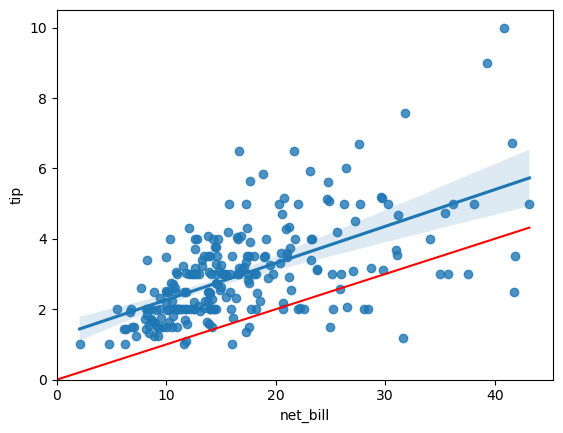

In [9]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.52e-06
Time:                        09:24:21   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

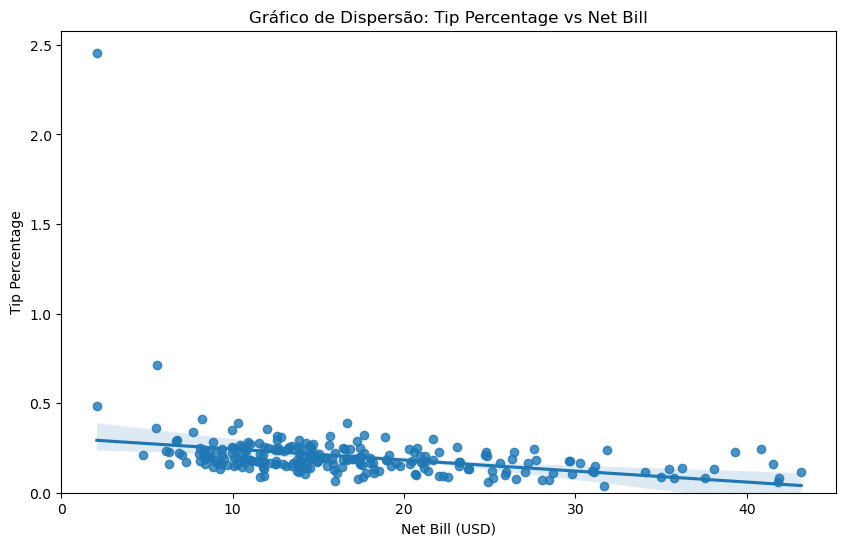

In [12]:
# Carregando a base de dados 'tips'
tips = sns.load_dataset("tips")

# Criando as variáveis 'tip_pct' e 'net_bill'
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustando o modelo de regressão de tip_pct por net_bill
model = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibindo os resultados do modelo
print(model.summary())

# Construindo o gráfico de dispersão para tip_pct por net_bill
plt.figure(figsize=(10, 6))
sns.regplot(y='tip_pct', x='net_bill', data=tips)

# Opções estéticas para o gráfico
plt.title('Gráfico de Dispersão: Tip Percentage vs Net Bill')
plt.xlabel('Net Bill (USD)')
plt.ylabel('Tip Percentage')
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico, mostrando gorjeta versus conta líquida, sugere uma relação positiva onde gorjetas maiores acompanham contas mais altas. O ajuste do modelo é visivelmente bom, como evidenciado pela inclinação acentuada da linha de regressão e provável alto R2 

O segundo gráfico, exibindo a porcentagem da gorjeta versus a conta líquida, indica uma relação muito mais fraca, 
baixo, sugerindo que a conta líquida não é um bom preditor da porcentagem da gorjeta.

Comparar diretamente os R2 de ambos não é válido porque eles se referem a modelos distintos com variáveis dependentes diferentes. As diferenças no ajuste dos modelos refletem como a conta líquida está associada ao valor absoluto da gorjeta versus sua porcentagem.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
# Simulando dados que se assemelham à base de gorjetas
np.random.seed(0)
sample_size = 100
total_bill_simulated = np.random.uniform(10, 60, sample_size)  # Total bill entre 10 e 60 USD
tip_percentage_simulated = np.random.uniform(0.05, 0.25, sample_size)  # Gorjeta entre 5% e 25% do total bill
tip_simulated = total_bill_simulated * tip_percentage_simulated

# Criando um DataFrame com os dados simulados
simulated_tips = pd.DataFrame({
    'total_bill': total_bill_simulated,
    'tip': tip_simulated,
    'net_bill': total_bill_simulated - tip_simulated
})

# Calculando a porcentagem da gorjeta nos dados simulados
simulated_tips['tip_pct'] = simulated_tips['tip'] / simulated_tips['net_bill']

# Ajustando o modelo de regressão para tip_pct por net_bill nos dados simulados
model_simulated = smf.ols('tip_pct ~ net_bill', data=simulated_tips).fit()

# Obtendo o valor predito para tip_pct nos dados simulados
simulated_tips['pred_tip_pct'] = model_simulated.fittedvalues

# Obtendo o valor predito para tip como tip_pct * net_bill nos dados simulados
simulated_tips['pred_tip'] = simulated_tips['pred_tip_pct'] * simulated_tips['net_bill']

# Ajustando o modelo de regressão para tip usando os valores preditos nos dados simulados
model_simulated_tip = smf.ols('tip ~ pred_tip', data=simulated_tips).fit()

# Calculando o R^2 do modelo para tip nos dados simulados
r_squared_simulated_tip = model_simulated_tip.rsquared

r_squared_simulated_tip


0.4033186197629055